In [21]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
data=pd.read_csv("all_stocks_5yr.csv")

In [3]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [5]:
data['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [11]:
data['Name'].nunique()

505

In [6]:
data['date'].unique()

array(['2013-02-08', '2013-02-11', '2013-02-12', ..., '2018-02-05',
       '2018-02-06', '2018-02-07'], dtype=object)

In [12]:
data[data['date']=='2013-11-08']['Name']

190        AAL
1449      AAPL
2708       AAP
3967      ABBV
5226       ABC
          ... 
612935     XYL
614194     YUM
615453     ZBH
616712    ZION
617971     ZTS
Name: Name, Length: 482, dtype: object

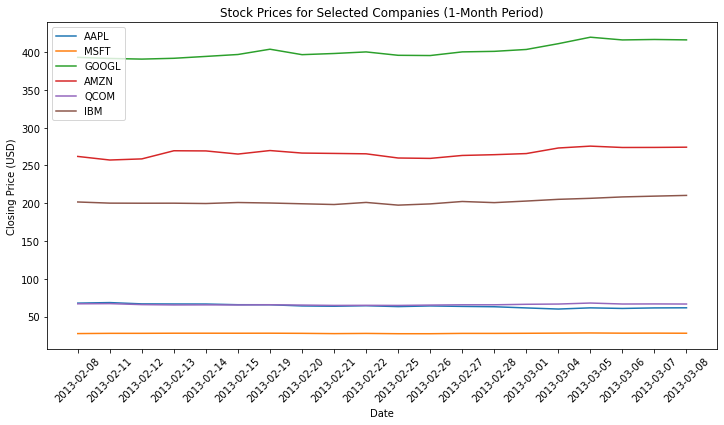

In [31]:
# List of specified companies
companies_to_plot = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'QCOM', 'IBM']

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['date'])

# Define the time period (e.g., 1 month)
start_date = '2013-02-08'
end_date = '2013-03-08'  # Adjust the end date as needed

# Filter data for the specified time period
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Group data by company and calculate the sum of closing prices for the selected time period
grouped_data = filtered_data.groupby('Name')['close'].sum().reset_index()

# Create a single visualization for comparative analysis
plt.figure(figsize=(12, 6))
plt.title(f"Stock Prices for Selected Companies (1-Month Period)")
for company in companies_to_plot:
    subset = data[(data['Name'] == company) & (data['date'] >= start_date) & (data['date'] <= end_date)]
    sns.lineplot(x='date', y='close', data=subset, label=company)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(loc='upper left')
plt.show()


In [24]:
companies_to_plot = ['AAPL', 'MSFT', 'GOOGL', 'AMZN','QCOM','IBM']
# Create a DataFrame containing only the data for the specified companies
filtered_data = data[data['Name'].isin(companies_to_plot)]

# Pivot the data to create a correlation matrix
correlation_table = filtered_data.pivot_table(index='date', columns='Name', values='volume')

# Calculate the correlation matrix
correlation_matrix = correlation_table.corr()

# Print the correlation table
print(correlation_matrix)

Name       AAPL      AMZN     GOOGL       IBM      MSFT      QCOM
Name                                                             
AAPL   1.000000  0.077036  0.544354  0.131500  0.447934  0.139494
AMZN   0.077036  1.000000  0.266027  0.213175  0.273642  0.229021
GOOGL  0.544354  0.266027  1.000000  0.275411  0.517904  0.159785
IBM    0.131500  0.213175  0.275411  1.000000  0.247069  0.170994
MSFT   0.447934  0.273642  0.517904  0.247069  1.000000  0.238965
QCOM   0.139494  0.229021  0.159785  0.170994  0.238965  1.000000


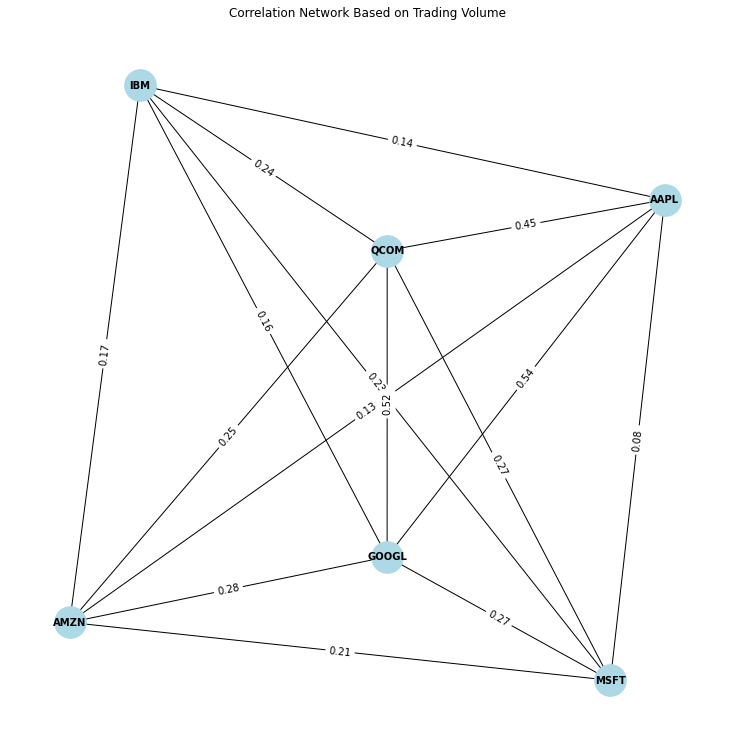

In [26]:
# Calculate the correlation matrix
correlation_matrix = correlation_table.corr()

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes (companies) to the graph
for company in companies_to_plot:
    G.add_node(company)

# Add weighted edges to the graph based on the correlation values
for i in range(len(companies_to_plot)):
    for j in range(i+1, len(companies_to_plot)):
        correlation = correlation_matrix.iloc[i, j]
        G.add_edge(companies_to_plot[i], companies_to_plot[j], weight=correlation)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # You can try other layout algorithms
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = {(i, j): f'{G[i][j]["weight"]:.2f}' for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Correlation Network Based on Trading Volume')
plt.show()
